In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pathlib import Path
from pprint import pprint

from cpdred.swissfel.proc.geometry import stream_to_unitcell_dataframe
from cpdred.swissfel.proc.constants import CELL

In [2]:
def set_violin_plot_color(plot_handle, color):
    for pc in plot_handle['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
    # for partname in ['cbars','cmins','cmaxes']:
    #     pc = plot_handle[partname]
    #     pc.set_edgecolor(color)

Combine all indexing results on a per-tag basis, plot total number indexed, lattice distirbutions

In [3]:
FINAL_STREAM_PATH = Path("/das/work/p21/p21958/final_stream_files")

False /das/work/p21/p21958/final_stream_files/run0008/run0008_dark.stream
False /das/work/p21/p21958/final_stream_files/run0008/run0008_light.stream
False /das/work/p21/p21958/final_stream_files/run0009/run0009_dark.stream
False /das/work/p21/p21958/final_stream_files/run0009/run0009_light.stream


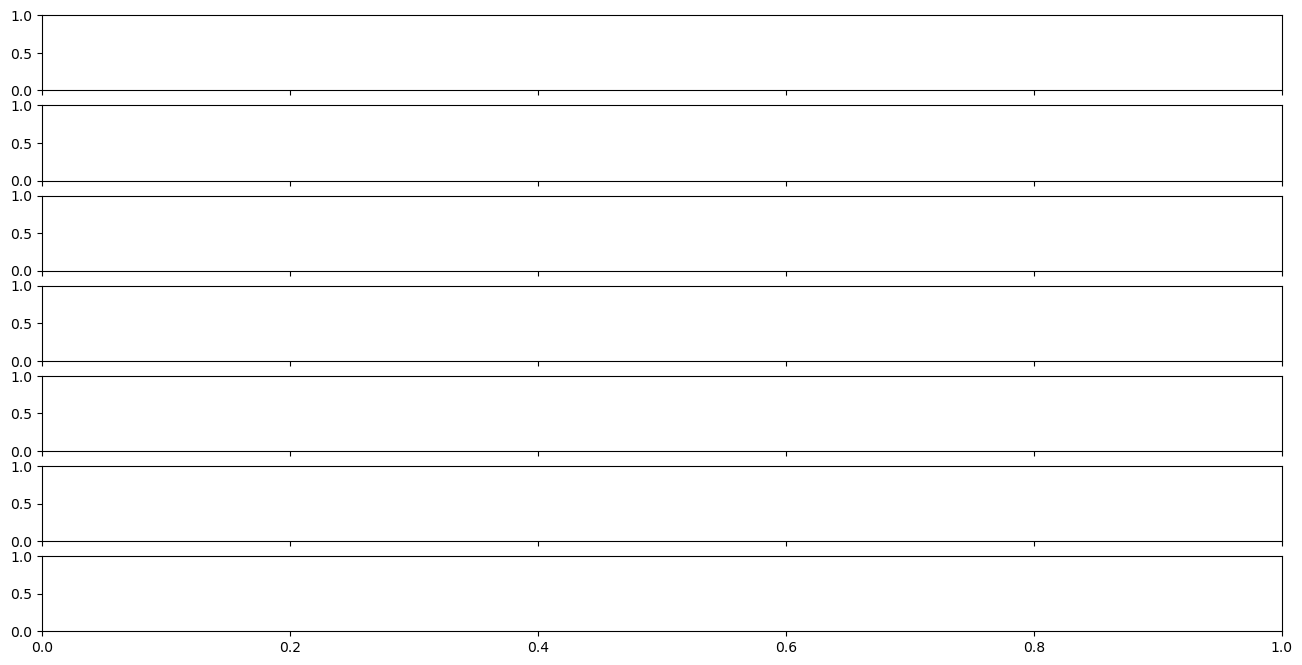

In [4]:
# control of plot style
WIDTH = 0.3
LATTICE_LABELS = (
    r'a ($\mathrm{\AA}$)', 
    r'b ($\mathrm{\AA}$)', 
    r'c ($\mathrm{\AA}$)', 
    r'$\alpha$ ($^\circ$)', 
    r'$\beta$ ($^\circ$)', 
    r'$\gamma$ ($^\circ$)')

# -------------------------

max_number_indexed = 0

fig, axes = plt.subplots(nrows=7, ncols=1, sharex=True, figsize=(16,8))

for run_number in range(8, 10):

    dark_stream = FINAL_STREAM_PATH / f"run{run_number:04d}" / f"run{run_number:04d}_dark.stream"
    light_stream = FINAL_STREAM_PATH / f"run{run_number:04d}" / f"run{run_number:04d}_light.stream"

    print(dark_stream.exists(), dark_stream)
    print(light_stream.exists(), light_stream)

    # for label, color, stream in [("dark", "blue", dark_stream), ("light", "orange", light_stream)]:

    #     lattice_dataframes = stream_to_unitcell_dataframe(stream, max_num_cells=50)
    #     if len(lattice_dataframes) > 0:
    #         lattices = pd.concat(lattice_dataframes)
    #     else:
    #         continue

    #     if label == "dark":
    #         x_shift = -0.175
    #     elif label == "light":
    #         x_shift = 0.175

    #     # -------------------------

    #     number_indexed = len(lattices)
    #     max_number_indexed = max(max_number_indexed, number_indexed)

    #     bar_handle = axes[0].bar(
    #         f"run {run_number}", 
    #         number_indexed, 
    #         width=np.sign(x_shift) * WIDTH, 
    #         align='edge', 
    #         color=color
    #     )
    #     axes[0].bar_label(bar_handle)

    #     # -------------------------

    #     for axis_index, lattice_parameter in enumerate(lattices.columns):

    #         if lattice_parameter in ['a', 'b', 'c']:
    #             scale_factor = 10.0  # convert from nm to A
    #         else:
    #             scale_factor = 1.0

    #         vp = axes[axis_index+1].violinplot(
    #             lattices[lattice_parameter] * scale_factor, 
    #             widths=WIDTH, 
    #             positions=[run_number - 8 + x_shift],
    #             showextrema=False, 
    #             showmedians=False,
    #         )
    #         set_violin_plot_color(vp, color)

#         # -------------------------

# for axis_index, lattice_value in enumerate(CELL):
#     axes[axis_index+1].hlines(lattice_value, -0.5, 125-0.5, color='k', lw=0.5)
#     axes[axis_index+1].set_ylabel(LATTICE_LABELS[axis_index])
#     axes[axis_index+1].set_ylim([lattice_value - 1.2, lattice_value + 1.2])
#     axes[axis_index+1].set_yticks(
#         [lattice_value - 1.0, lattice_value - 0.5, lattice_value, lattice_value + 0.5, lattice_value + 1.0],
#         ["-1.0", "-0.5", str(lattice_value), "+0.5", "+1.0"],
#     )
#     axes[axis_index+1].grid(axis='y', linestyle='--')

# axes[0].set_ylim([0, max_number_indexed * 1.3])
# axes[0].set_ylabel('no.')
# axes[0].get_yaxis().set_ticks([])

# axes[0].legend(
#     ['dark', 'light'],
#     loc='lower right',
#     prop={'size': 8}
# )

# axes[-1].set_xticks(
#     x_index,
#     labels=[p.split('/')[-1] for p in filtered_tags[:MAX_NUM_TAGS]],
#     rotation=45,
#     ha='right', 
#     rotation_mode='anchor',
# )

plt.show()